In [1]:
import pandas as pd


In [2]:
df = pd.read_excel('nuclear_energy_overview_eia.xlsx', engine='openpyxl')


FileNotFoundError: [Errno 2] No such file or directory: 'nuclear_energy_overview_eia.xlsx'

In [3]:
df = pd.read_excel(r'C:\Users\Suyas\OneDrive\Desktop\aws\Yoroi prep\archive\nuclear_energy_overview_eia.csv.xlsx', engine='openpyxl')


FileNotFoundError: [Errno 2] No such file or directory: 'C:\\Users\\Suyas\\OneDrive\\Desktop\\aws\\Yoroi prep\\archive\\nuclear_energy_overview_eia.csv.xlsx'

In [4]:
import pandas as pd

df = pd.read_csv(r'C:\Users\Suyas\OneDrive\Desktop\aws\Yoroi prep\archive\nuclear_energy_overview_eia.csv')



In [5]:
df.head()

,Year,Month,"Nuclear Generating Units, Total Operable Units","Nuclear Generating Units, Net Summer Capacity",Nuclear Electricity Net Generation,Nuclear Share of Electricity Net Generation,"Nuclear Generating Units, Capacity Factor"
0,1994,December,109,99.148,60497,22.4,82.0
1,1995,January,109,99.148,63342,22.6,85.9
2,1995,February,109,99.148,51858,20.6,77.8
3,1995,March,109,99.148,51880,19.9,70.3
4,1995,April,109,99.148,49321,20.2,69.2


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 351 entries, 0 to 350
Data columns (total 7 columns):
 #   Column                                          Non-Null Count  Dtype  
---  ------                                          --------------  -----  
 0   Year                                            351 non-null    int64  
 1   Month                                           351 non-null    object 
 2   Nuclear Generating Units, Total Operable Units  351 non-null    int64  
 3   Nuclear Generating Units, Net Summer Capacity   351 non-null    float64
 4   Nuclear Electricity Net Generation              351 non-null    int64  
 5   Nuclear Share of Electricity Net Generation     351 non-null    float64
 6   Nuclear Generating Units, Capacity Factor       351 non-null    float64
dtypes: float64(3), int64(3), object(1)
memory usage: 19.3+ KB


In [7]:
df.rename(columns={
    'year':'date'
    'Nuclear Generating Units, Capacity Factor':'capacity_factor'
} , inplace=True)

SyntaxError: invalid syntax (356860849.py, line 3)

In [8]:
df.rename(columns={
    'year': 'date'
    'Nuclear Generating Units, Capacity Factor': 'capacity_factor'
} , inplace=True)

SyntaxError: invalid syntax (915366222.py, line 3)

In [9]:
df.rename(columns={
    'year': 'date',
    'Nuclear Generating Units, Capacity Factor': 'capacity_factor'
} , inplace=True)

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns


In [11]:
sns.set(style='whitegrid')


In [12]:
df['date'] = pd.to_datetime(df['date'], errors='coerce')


KeyError: 'date'

In [13]:
df.columns


Index(['Year', 'Month', 'Nuclear Generating Units, Total Operable Units',
       'Nuclear Generating Units, Net Summer Capacity',
       'Nuclear Electricity Net Generation',
       'Nuclear Share of Electricity Net Generation', 'capacity_factor'],
      dtype='object')

In [14]:
df.rename(columns={
    'year': 'date'
} , inplace=True)

In [15]:
df.columns

Index(['Year', 'Month', 'Nuclear Generating Units, Total Operable Units',
       'Nuclear Generating Units, Net Summer Capacity',
       'Nuclear Electricity Net Generation',
       'Nuclear Share of Electricity Net Generation', 'capacity_factor'],
      dtype='object')

In [16]:
df['date'] = pd.to_datetime(df[['Year', 'Month']].assign(DAY=1))


ValueError: Unable to parse string "December" at position 0

In [17]:
df['Month'] = df['Month'].str.strip().str.capitalize()  # Clean and standardize
month_map = {
    'January': 1, 'February': 2, 'March': 3, 'April': 4,
    'May': 5, 'June': 6, 'July': 7, 'August': 8,
    'September': 9, 'October': 10, 'November': 11, 'December': 12
}
df['month_num'] = df['Month'].map(month_map)


In [18]:
df['date'] = pd.to_datetime(dict(year=df['Year'], month=df['month_num'], day=1))


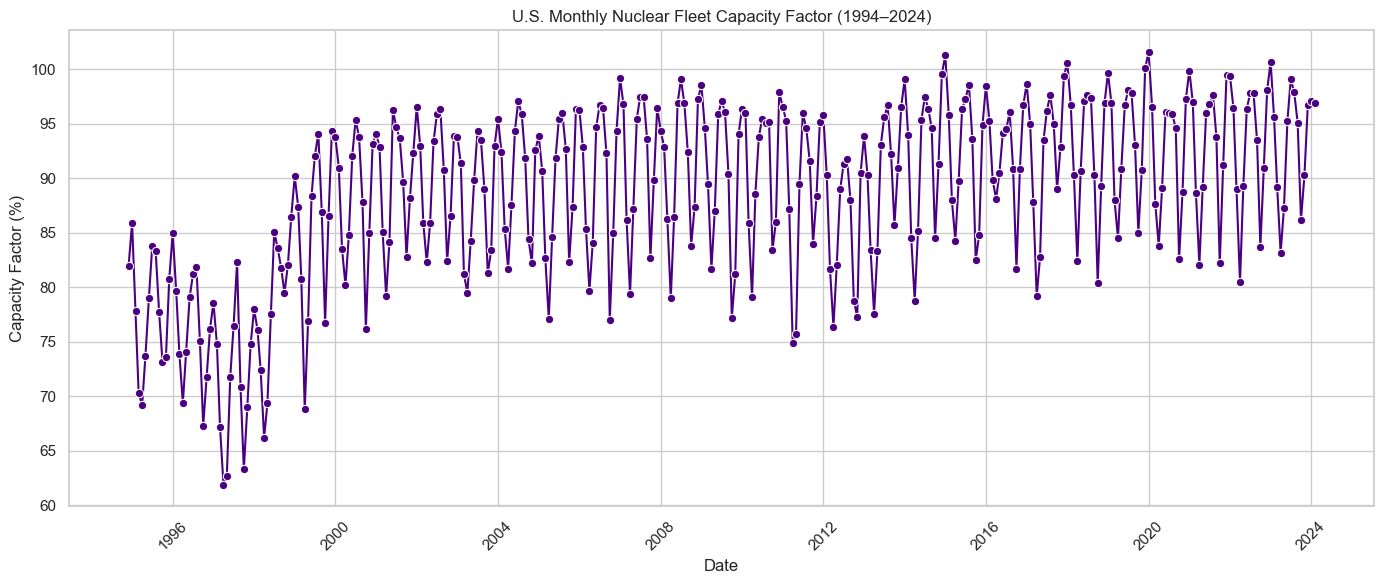

In [19]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style='whitegrid')

plt.figure(figsize=(14,6))
sns.lineplot(data=df, x='date', y='capacity_factor', marker='o', color='indigo')
plt.title('U.S. Monthly Nuclear Fleet Capacity Factor (1994–2024)')
plt.xlabel('Date')
plt.ylabel('Capacity Factor (%)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [20]:
df.to_csv('nuclear_capacity_cleaned.csv', index=False)


In [21]:
df.to_csv(os.path.join("C:\Users\Suyas\OneDrive\Desktop\aws\Yoroi prep\capacity_analysis", 'nuclear_capacity_cleaned.csv'), index=False)


SyntaxError: (unicode error) 'unicodeescape' codec can't decode bytes in position 2-3: truncated \UXXXXXXXX escape (29746492.py, line 1)

In [22]:
import os
save_path = r'C:\Users\Suyas\OneDrive\Desktop\aws\Yoroi prep\capacity_analysis'
os.makedirs(save_path, exist_ok=True)


In [23]:
df.to_csv(save_path + r'\nuclear_capacity_cleaned.csv', index=False)
